In [ ]:
!pip install librosa


In [ ]:
import librosa

In [ ]:
file_path='Alesis-Fusion-Nylon-String-Guitar-C4.wav'
y,sr=librosa.load(file_path , sr=22050)

In [ ]:
print(f"sample rate : {sr}")
print(f"Audio array shape : {y.shape}")

sample rate : 22050
Audio array shape : (48687,)


In [ ]:
from IPython.display import Audio
Audio(y, rate=sr)

In [ ]:
import matplotlib.pyplot as plt


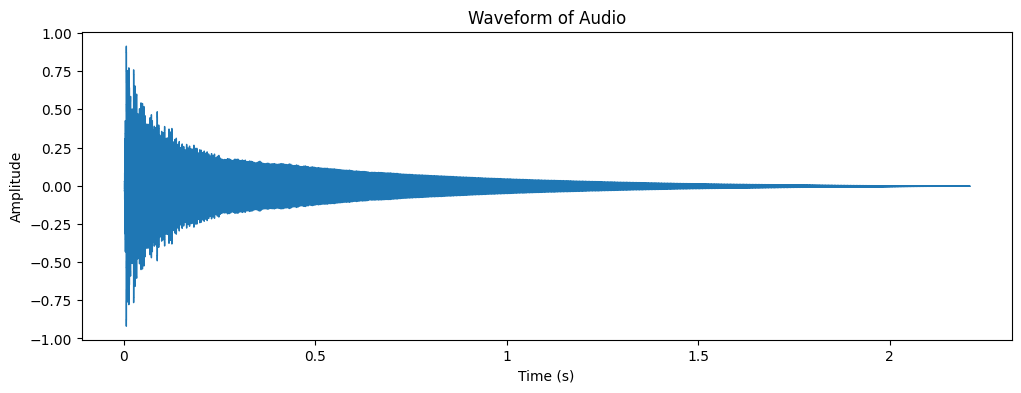

In [ ]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
import numpy as np
D = librosa.stft(y)
S_db= librosa.amplitude_to_db(abs(D) , ref=np.max)

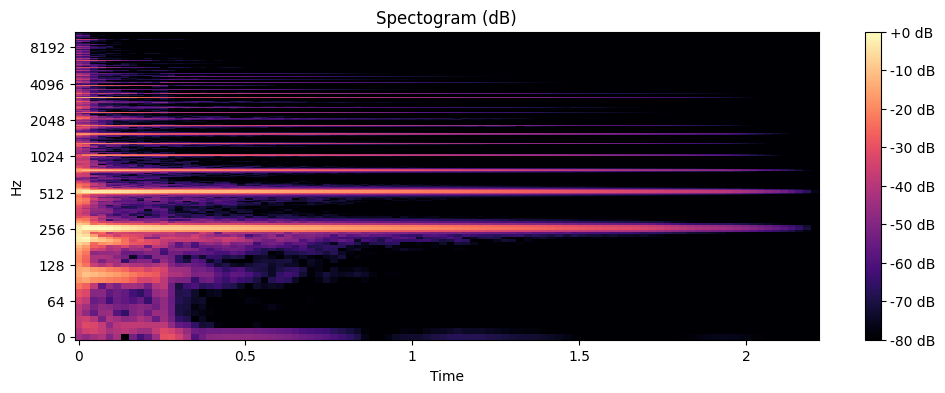

In [ ]:
plt.figure(figsize=(12,4))
librosa.display.specshow(S_db,sr=sr,x_axis='time',y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectogram (dB)')
plt.show()

In [ ]:
mfccs=librosa.feature.mfcc(y=y,sr=sr,n_mfcc=13)

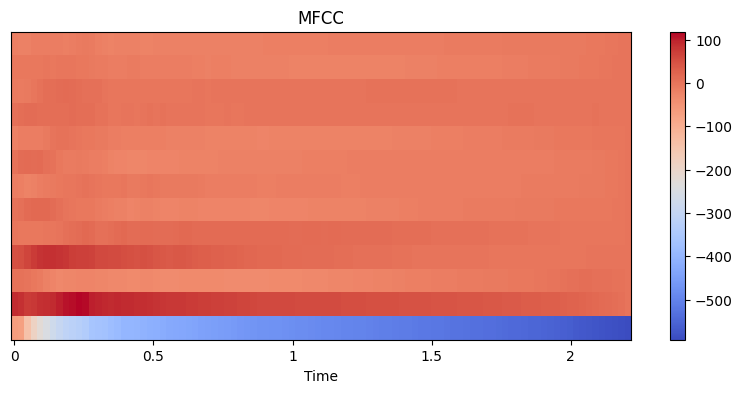

In [ ]:
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs,sr=sr,x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()

In [ ]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

<function matplotlib.pyplot.show(close=None, block=None)>

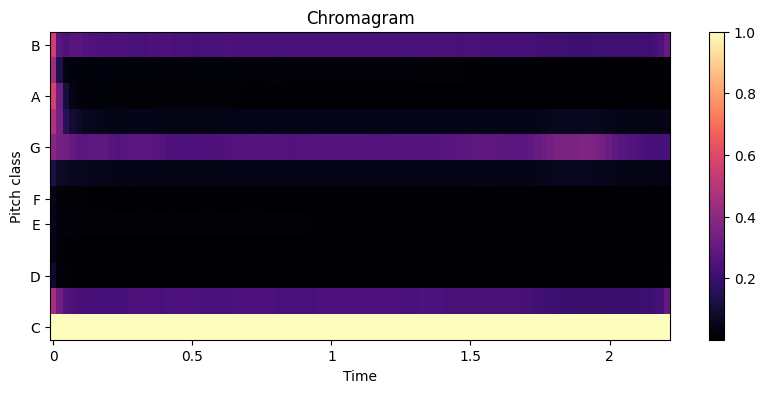

In [ ]:
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma, sr=sr,x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title("Chromagram")
plt.show

In [ ]:
spectral_centroid=librosa.feature.spectral_centroid(y=y , sr=sr)[0]


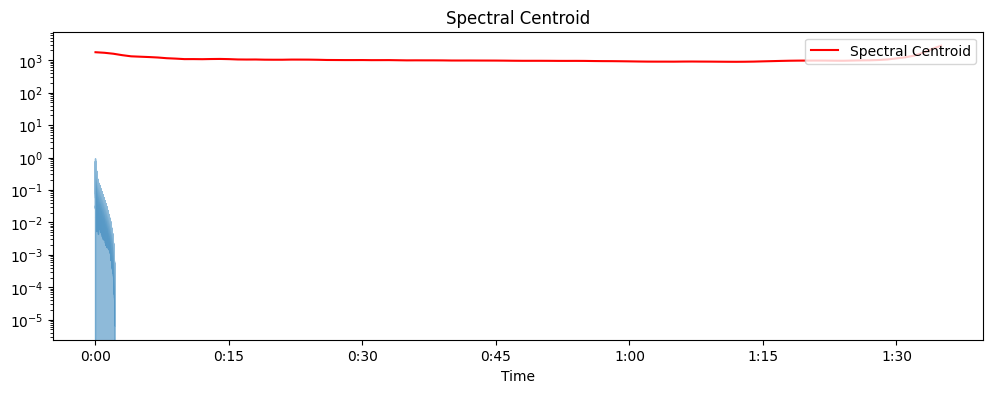

In [ ]:
# Plot waveform and spectral centroid
plt.figure(figsize=(12, 4))
plt.semilogy(spectral_centroid, color='r', label='Spectral Centroid')
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.legend(loc='upper right')
plt.title("Spectral Centroid")
plt.show()

In [ ]:
# Extract spectral roll-off
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)[0]

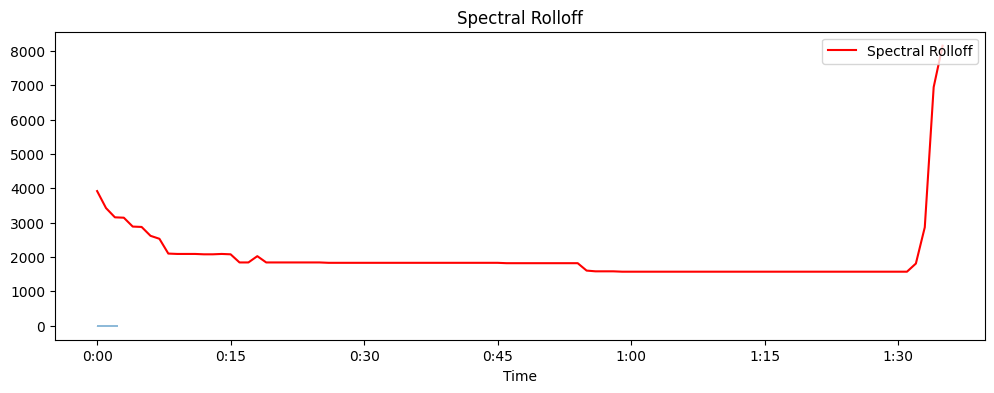

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(spectral_rolloff, color='r', label='Spectral Rolloff')
plt.legend(loc='upper right')
plt.title("Spectral Rolloff")
plt.show()

In [ ]:
# Calculate zero-crossing rate
zero_crossings = librosa.feature.zero_crossing_rate(y)

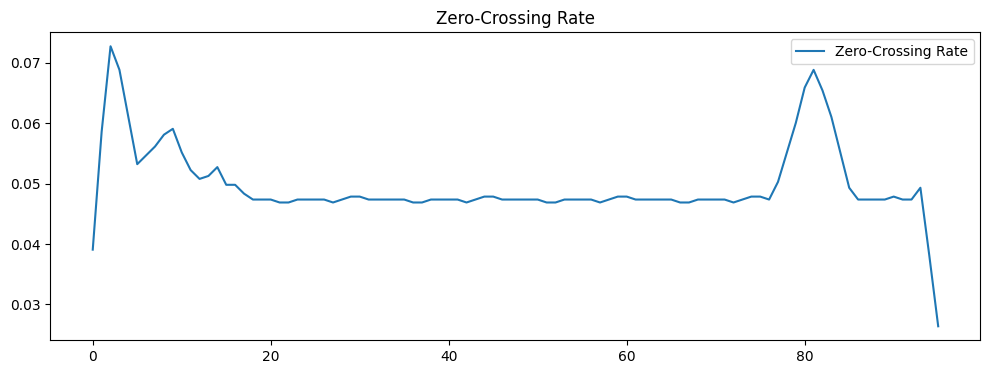

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(zero_crossings[0], label="Zero-Crossing Rate")
plt.legend(loc='upper right')
plt.title("Zero-Crossing Rate")
plt.show()

In [ ]:
# Speed up the audio by 1.5x
y_fast = librosa.effects.time_stretch(y, rate=1.5)

In [ ]:
Audio(y_fast, rate=sr)

In [ ]:
# Shift pitch by 4 semitones up
y_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=4)

In [ ]:
Audio(y_shifted, rate=sr)

In [ ]:
# Separate harmonic and percussive components
y_harmonic, y_percussive = librosa.effects.hpss(y)

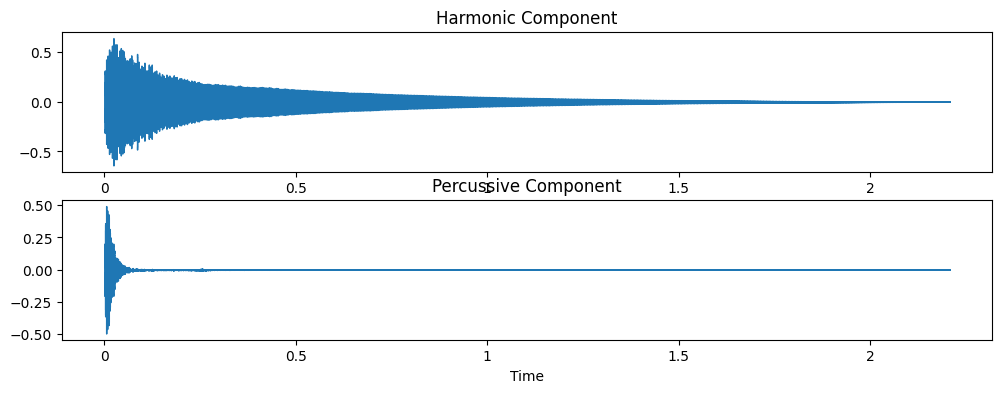

In [ ]:
# Display both components
plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y_harmonic, sr=sr)
plt.title("Harmonic Component")
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_percussive, sr=sr)
plt.title("Percussive Component")
plt.show()

In [ ]:
# Detect beats
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

In [ ]:
# Convert beat frames to time
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
print(f"Tempo: {tempo} BPM")
print(f"Beat Times: {beat_times}")

Tempo: 0.0 BPM
Beat Times: []


In [ ]:
# Detect onsets
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

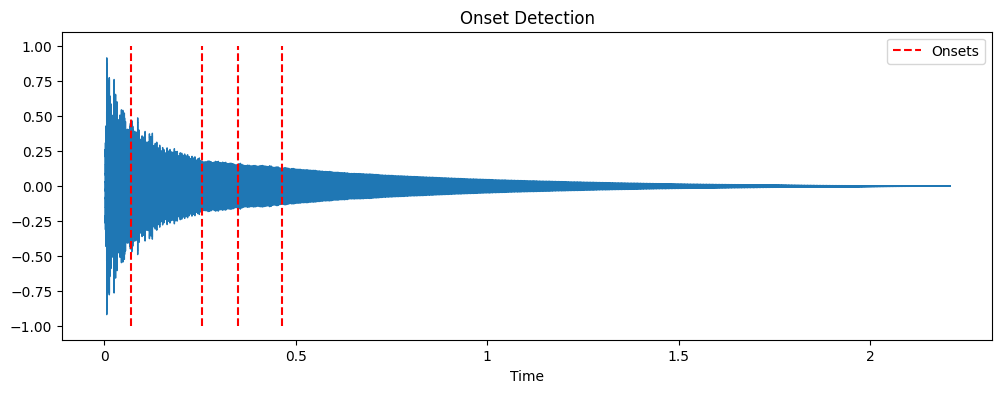

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.vlines(onset_times, ymin=-1, ymax=1, color='r', linestyle='--', label='Onsets')
plt.legend()
plt.title("Onset Detection")
plt.show()

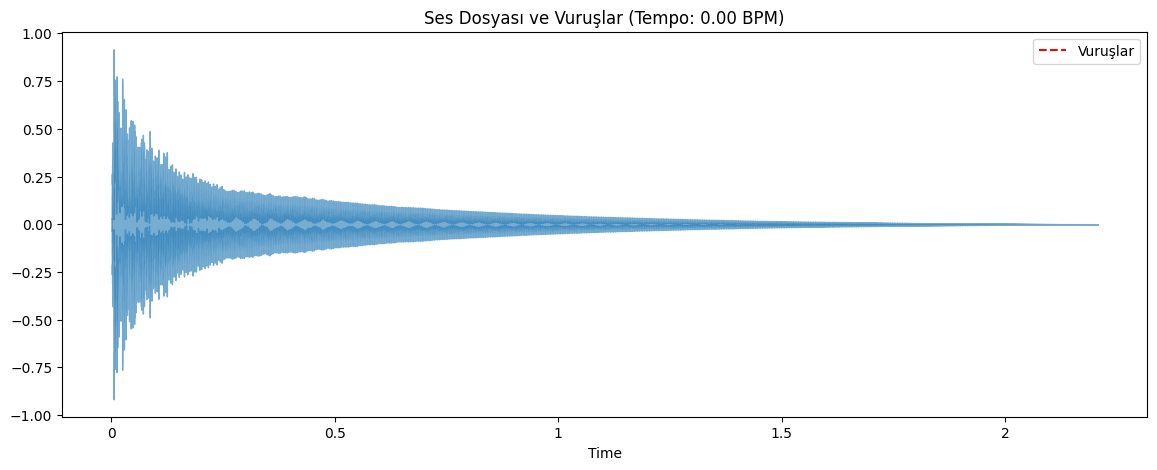

MFCC özellikleri çıkarılamadı. Ses dosyası veya vuruşlar uygun değil.


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the audio file
audio_path = 'Alesis-Fusion-Nylon-String-Guitar-C4.wav'  # Specify the path to your audio file
y, sr = librosa.load(audio_path)

# 2. Perform beat tracking to detect beats
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

# Convert beat frames to time stamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# 3. Segment the audio using beat times
mfcc_features = []  # List to store MFCC features for each segment

# Extract MFCC features from each beat interval
for i in range(len(beat_frames) - 1):
    start_frame = beat_frames[i]
    end_frame = beat_frames[i + 1]

    # Slice the audio signal for this segment
    segment = y[start_frame:end_frame]

    # Extract MFCC features for the segment
    mfcc = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=13)

    # Take the mean across time (summarize MFCC features)
    mfcc_mean = np.mean(mfcc, axis=1)

    # Append the mean MFCCs to the list
    mfcc_features.append(mfcc_mean)

# 4. Visualize the results
# Mark beat times on the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.6)  # Plot the waveform
plt.vlines(beat_times, -1, 1, color='r', linestyle='--', label='Beats')  # Mark the beats
plt.title(f'Audio Waveform and Beats (Tempo: {tempo:.2f} BPM)')
plt.legend()
plt.show()

# 5. Analyze the MFCC features
# Make sure the mfcc_features list is not empty
if len(mfcc_features) > 0:
    # Convert list of MFCC vectors to a NumPy array
    mfcc_features_array = np.array(mfcc_features)

    # Visualize the MFCC features
    plt.figure(figsize=(10, 6))
    plt.imshow(mfcc_features_array.T, aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(label='MFCC Value')
    plt.xlabel('Segment Index')
    plt.ylabel('MFCC Coefficients')
    plt.title('MFCC Features per Segment')
    plt.show()
else:
    print("MFCC features could not be extracted. The audio file or beats might be unsuitable.")
